<a href="https://colab.research.google.com/github/Akshay00713/mlproject/blob/main/Top_Football_Leagues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install git

# Configure Git
!git config --global user.name "Akshay00713"
!git config --global user.email "akshaymairal13@gmail.com"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!git clone https://github.com/Akshay00713/Machine-Learning.git

Cloning into 'Machine-Learning'...


In [ ]:
%cd Machine-Learning

/content/Machine-Learning


In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('Data.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [ ]:
messi = df[['Goals', 'Year']][df['Player Names'] == 'Lionel Messi']
print("Leo Messi Goals:")
messi

Leo Messi Goals:


,Goals,Year
12,37,2016
107,33,2017
195,36,2018
333,25,2019
528,4,2020


In [ ]:
Liv_top = df[['Player Names','Goals','Year']][df['Club']=='(LIV)']
Liv_top

,Player Names,Goals,Year
20,Mohamed Salah,15,2016
67,Roberto Firmino,11,2016
68,Sadio Mane,13,2016
263,Mohamed Salah,22,2018
267,Sadio Mane,22,2018
445,Sadio Mane,18,2019
451,Mohamed Salah,19,2019
605,Diogo Jota,5,2020
611,Mohamed Salah,8,2020
617,Sadio Mane,4,2020


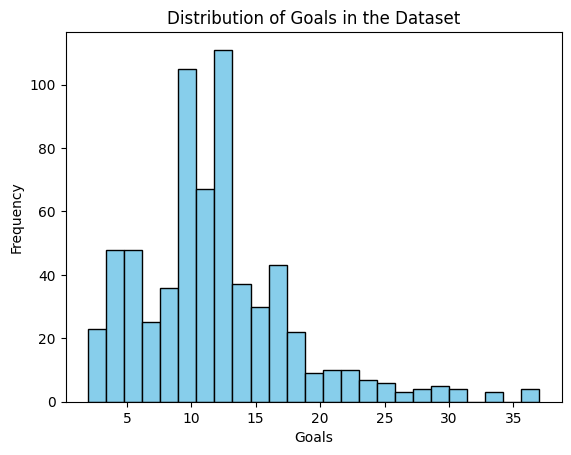

In [ ]:
Goals = df['Goals']
num_bins = int(math.sqrt(len(Goals))) #25 bins
plt.hist(Goals, bins=num_bins, color='skyblue', edgecolor='black')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals in the Dataset')
plt.show()

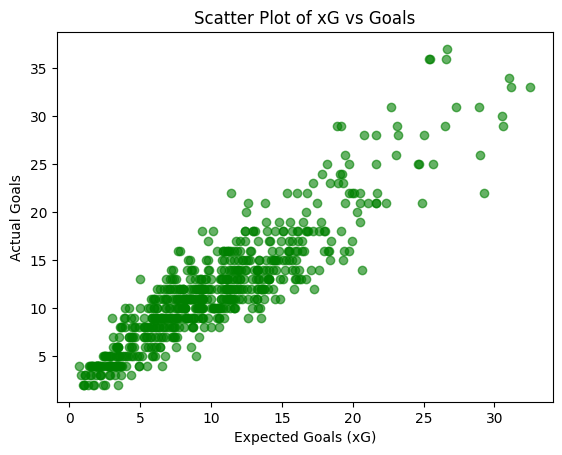

Correlation coefficient: 0.9062198687054204


In [ ]:
xg = df["xG"]
plt.scatter(xg , Goals , color='green', alpha=0.6)
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.title('Scatter Plot of xG vs Goals')
plt.show()
correlation = df['xG'].corr(df['Goals'])
print(f"Correlation coefficient: {correlation}")


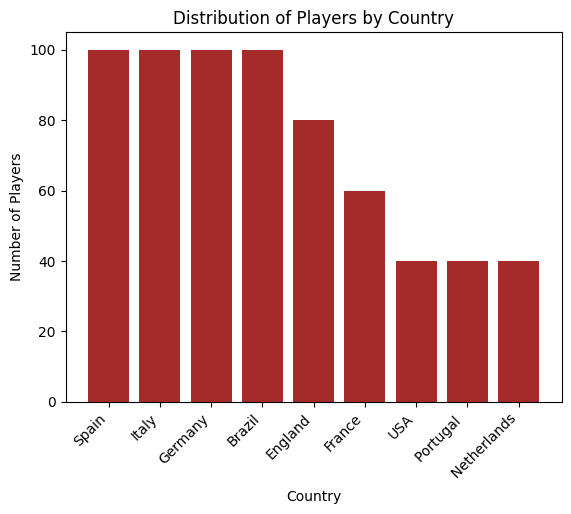

In [ ]:
country_counts = df['Country'].value_counts()
plt.bar(country_counts.index, country_counts, color='brown')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Country')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-10-7bd2b80a0e3f>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_scorers_2018 = top_scorers_2018.groupby('League').apply(lambda x: x.nlargest(3, 'Goals')).reset_index(drop=True)


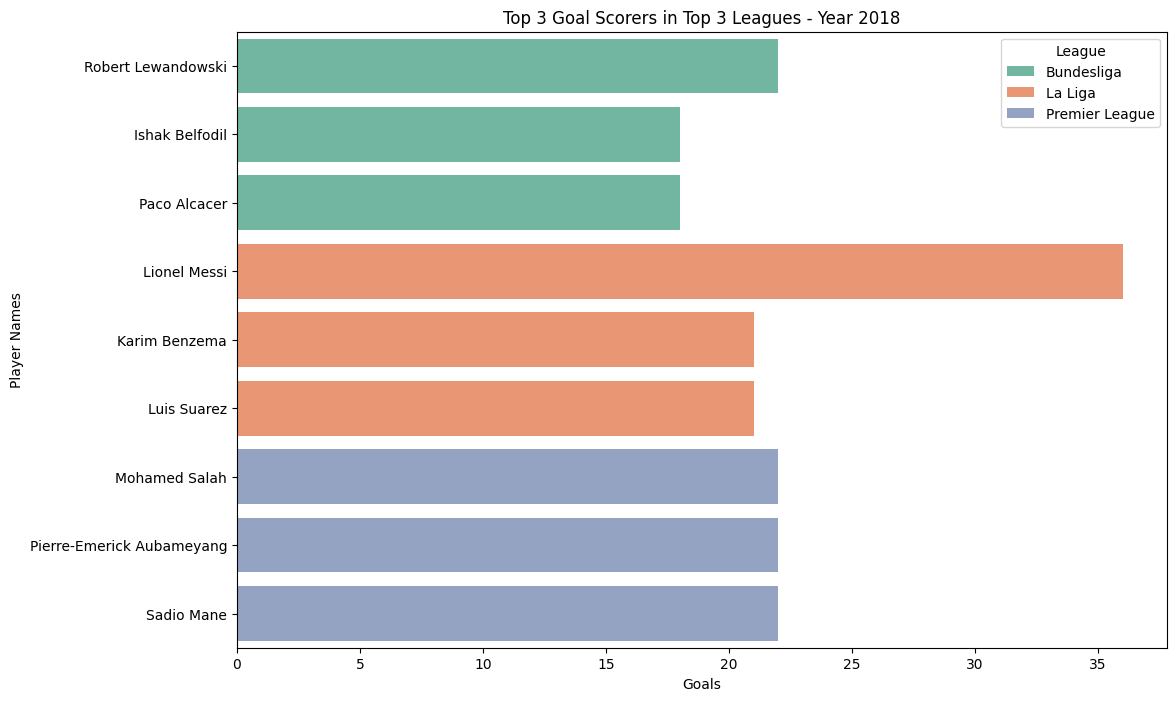

In [ ]:
leagues_of_interest = ['La Liga', 'Bundesliga' ,'Premier League']
ds_2018_leagues = df[(df['Year'] == 2018) & (df['League'].isin(leagues_of_interest))]
# Find the top 5 goal scorers for each league in 2018
top_scorers_2018 = ds_2018_leagues.groupby(['League', 'Player Names']).sum().reset_index()
top_scorers_2018 = top_scorers_2018.groupby('League').apply(lambda x: x.nlargest(3, 'Goals')).reset_index(drop=True)
plt.figure(figsize=(12, 8))
sns.barplot(x='Goals', y='Player Names', hue='League', data=top_scorers_2018, palette='Set2')
plt.xlabel('Goals')
plt.ylabel('Player Names')
plt.title('Top 3 Goal Scorers in Top 3 Leagues - Year 2018')
plt.show()

In [ ]:
df['Club'].replace('None', np.nan, inplace=True)

<ipython-input-11-e8c9e4208274>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Club'].replace('None', np.nan, inplace=True)


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
# so we notice 34 null values in the club column
print("Columns with missing values:" , missing_values[missing_values > 0])
#Missing values treatment by removal
#Removal of rows with any missing values
df_no_missing_rows = df.dropna()
print("Original Dataset Shape:", df.shape)
print("Dataset Shape after Removing Rows with Missing Values:", df_no_missing_rows.shape)

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64
Columns with missing values: Club    34
dtype: int64
Original Dataset Shape: (660, 15)
Dataset Shape after Removing Rows with Missing Values: (626, 15)


In [ ]:
selected_columns = ['Matches_Played','Shots','Mins','xG','OnTarget', 'Goals']
# Display Min, Max, Mean, Variance, Standard Deviation
descriptive_stats = df[selected_columns].describe().transpose()
print("Descriptive Statistics:")
descriptive_stats

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Matches_Played,660.0,22.371212,9.754658,2.00,14.00,24.000,31.0000,38.00
Shots,660.0,64.177273,34.941622,5.00,37.75,62.000,86.0000,208.00
Mins,660.0,2071.416667,900.595049,264.00,1363.50,2245.500,2822.0000,4177.00
xG,660.0,10.089606,5.724844,0.71,6.10,9.285,13.2525,32.54
OnTarget,660.0,28.365152,16.363149,2.00,17.00,26.000,37.0000,102.00
Goals,660.0,11.784848,5.982454,2.00,8.00,11.000,14.0000,37.00


In [ ]:
skewness = df[selected_columns].apply(skew)
print("Skewness:")
skewness

Skewness:


,0
Matches_Played,-0.368400
Shots,0.674613
Mins,-0.356548
xG,0.954183
OnTarget,1.153654
Goals,1.178648


In [ ]:
kurt = df[selected_columns].apply(kurtosis)
print("Kurtosis:")
kurt

Kurtosis:


,0
Matches_Played,-1.130858
Shots,0.612652
Mins,-1.053533
xG,1.247170
OnTarget,2.338814
Goals,2.303763


In [ ]:
goals_sum=df['Goals'].sum()
print("Sum of Goals:")
goals_sum

Sum of Goals:


7778

In [ ]:
covariance_matrix = df[selected_columns].cov()
correlation_matrix = df[selected_columns].corr()
#covariance matrix
print("Covariance Matrix:")
covariance_matrix

Covariance Matrix:


,Matches_Played,Shots,Mins,xG,OnTarget,Goals
Matches_Played,95.153343,268.650331,8620.113682,38.834456,115.377144,39.460868
Shots,268.650331,1220.916933,25067.517830,171.268295,527.851711,174.494951
Mins,8620.113682,25067.517830,811071.442210,3652.680073,10741.853692,3698.493424
xG,38.834456,171.268295,3652.680073,32.773835,79.872420,31.036774
OnTarget,115.377144,527.851711,10741.853692,79.872420,267.752653,84.547574
Goals,39.460868,174.494951,3698.493424,31.036774,84.547574,35.789755


In [ ]:
print("\n\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


,Matches_Played,Shots,Mins,xG,OnTarget,Goals
Matches_Played,1.000000,0.788192,0.981231,0.695411,0.722838,0.676200
Shots,0.788192,1.000000,0.796597,0.856190,0.923213,0.834758
Mins,0.981231,0.796597,1.000000,0.708465,0.728925,0.686461
xG,0.695411,0.856190,0.708465,1.000000,0.852641,0.906220
OnTarget,0.722838,0.923213,0.728925,0.852641,1.000000,0.863684
Goals,0.676200,0.834758,0.686461,0.906220,0.863684,1.000000


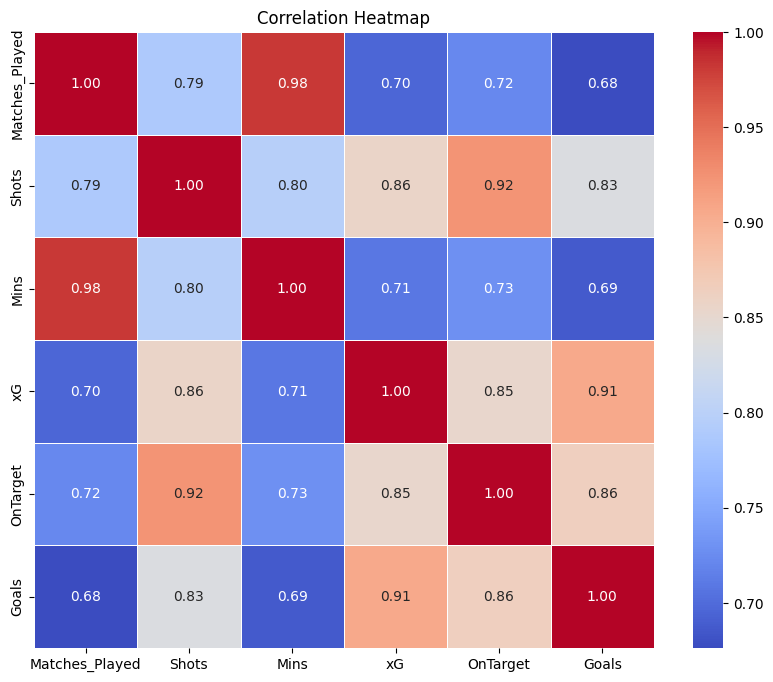

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
contingency_table = pd.crosstab(df['Country'], df['League'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
#observed data is highly inconsistent with the assumption of independence as p-value is too small
#print("Degree of Freedom:" ,dof)
#print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)) contingency table code
if p < 0.05:
    print("There is a significant association between the nationality of players and the football leagues they play in.")
else:
    print("There is no significant association between the nationality of players and the football leagues they play in.")
#therfore there is a meaningful relationship between the nationality of players and the football leagues they play in
#large chi-square value and a very small p-value suggest a significant association between the "Country" and "League" variables

Chi-square value: 5279.999999999999
P-value: 0.0
There is a significant association between the nationality of players and the football leagues they play in.


In [ ]:
goals_spain = df[df['Country'] == 'Spain']['Goals']
goals_other_countries = df[df['Country'] != 'Spain']['Goals']

population_std = goals_other_countries.std()
sample_mean = goals_spain.mean()
population_mean = goals_other_countries.mean()
sample_size = len(goals_spain)
alpha = 0.05

# Z-score calculation
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print("Mean Goals (Spain):", sample_mean)
print("Mean Goals (Other Countries):", population_mean)
print("Z-Score is:", z_score)

# Critical z-score
z_critical = stats.norm.ppf(1 - alpha/2)
print("Critical Z-Score:", z_critical)

# Compare z-score with critical z-score
if abs(z_score) > z_critical:
    print("Reject Null Hypothesis: There is a significant difference in the average goals between Spanish players and players from other countries.")
else:
    print("Fail To Reject Null Hypothesis: There is no significant difference in the average goals between Spanish players and players from other countries.")

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(z_score))
print("Two-sided P-value is:", p_value)

# Compare p-value with alpha for the two-sided test
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in the average goals between Spanish players and players from other countries.")
else:
    print("Fail To Reject Null Hypothesis: There is no significant difference in the average goals between Spanish players and players from other countries.")

Mean Goals (Spain): 13.14
Mean Goals (Other Countries): 11.542857142857143
Z-Score is: 2.764135138589476
Critical Z-Score: 1.959963984540054
Reject Null Hypothesis: There is a significant difference in the average goals between Spanish players and players from other countries.
Two-sided P-value is: 0.00570738964737183
Reject Null Hypothesis: There is a significant difference in the average goals between Spanish players and players from other countries.


In [ ]:
group1 = df[df['League'] == 'Premier League']['Goals']
group2 = df[df['League'] == 'La Liga']['Goals']
group3 = df[df['League'] == 'Bundesliga']['Goals']
f_statistic, p_value = stats.f_oneway(group1, group2, group3)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject null hypothesis. There is no significant difference between the means.")

F-statistic: 1.0667411890632101
P-value: 0.345537505680975
Fail to reject null hypothesis. There is no significant difference between the means.


In [ ]:
mean_goals_group1 = group1.mean()
mean_goals_group2 = group2.mean()
mean_goals_group3 = group3.mean()
print("Mean Goals (Premier League):", mean_goals_group1)
print("Mean Goals (La Liga):", mean_goals_group2)
print("Mean Goals (Bundesliga):", mean_goals_group3)

Mean Goals (Premier League): 13.475
Mean Goals (La Liga): 13.14
Mean Goals (Bundesliga): 12.18


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#LDA

X_lda = df[['Country', 'League', 'Matches_Played', 'Substitution ', 'Mins', 'xG', 'Shots', 'OnTarget', 'Year']]
y_lda = df['Goals']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X_lda_copy = X_lda.copy()

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
X_lda_copy['Country'] = label_encoder.fit_transform(X_lda_copy['Country'])
X_lda_copy['League'] = label_encoder.fit_transform(X_lda_copy['League'])

# Standardize the features
scaler_lda = StandardScaler()
X_lda_std = scaler_lda.fit_transform(X_lda_copy)

# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_transformed = lda.fit_transform(X_lda_std, y_lda)

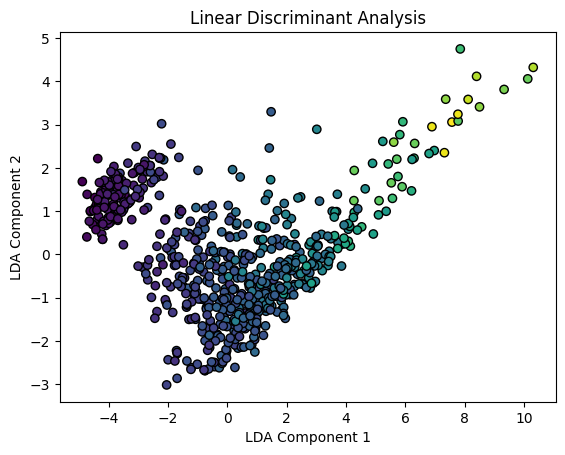

In [ ]:
plt.scatter(X_lda_transformed[:, 0], X_lda_transformed[:, 1], c=y_lda, cmap='viridis', edgecolor='k')
plt.title('Linear Discriminant Analysis')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_lda_std, y_lda)

# Print the explained variance ratio and cumulative explained variance
explained_variance_ratio = lda.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio: [0.82256451 0.11448278]
Cumulative Explained Variance: [0.82256451 0.93704729]


In [ ]:
from sklearn.decomposition import PCA

# Assuming 'ds' is your DataFrame
X_pca = df[['Country', 'League', 'Matches_Played', 'Substitution ', 'Mins', 'xG', 'Shots', 'OnTarget', 'Year']]
y_pca = df['Goals']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X_pca_copy = X_pca.copy()

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
X_pca_copy['Country'] = label_encoder.fit_transform(X_pca_copy['Country'])
X_pca_copy['League'] = label_encoder.fit_transform(X_pca_copy['League'])

# Standardize the features
scaler_pca = StandardScaler()
X_pca_std = scaler_pca.fit_transform(X_pca_copy)

# PCA
pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_pca_std)

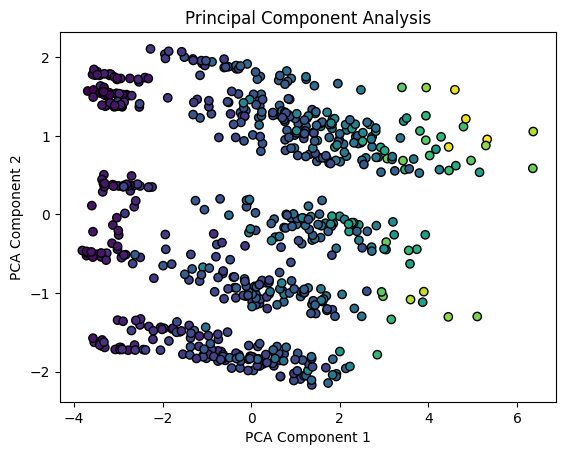

In [ ]:
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=y_pca, cmap='viridis', edgecolor='k')
plt.title('Principal Component Analysis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_lda_std)

# Print the explained variance ratio and cumulative explained variance
explained_variance_ratio_pca = pca.explained_variance_ratio_
cumulative_explained_variance_pca = explained_variance_ratio_pca.cumsum()

print("Explained Variance Ratio (PCA):", explained_variance_ratio_pca)
print("Cumulative Explained Variance (PCA):", cumulative_explained_variance_pca)

Explained Variance Ratio (PCA): [0.51033787 0.17558846]
Cumulative Explained Variance (PCA): [0.51033787 0.68592633]


Accuracy: 0.9242424242424242
Error Rate: 0.0757575757575758
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.92      0.95       105
        True       0.76      0.93      0.83        27

    accuracy                           0.92       132
   macro avg       0.87      0.92      0.89       132
weighted avg       0.93      0.92      0.93       132

Precision: 0.7575757575757576
Recall: 0.9259259259259259
F-measure: 0.8333333333333334


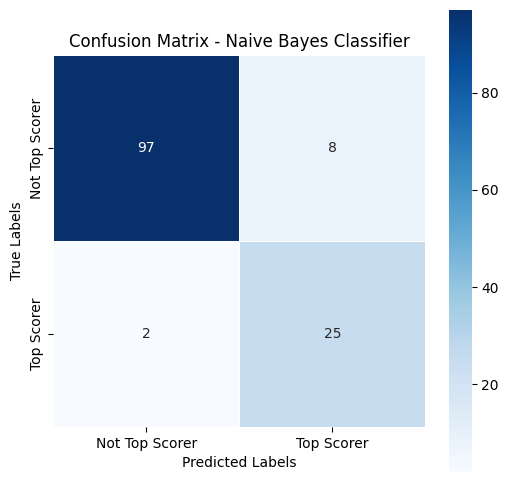

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, precision_score

# Features (X)
X = df[['Goals', 'Shots', 'OnTarget', 'Mins']]

# Create a binary target variable based on a threshold for being a top scorer
df['IsTopScorer'] = df['Goals'] > 15

y = df['IsTopScorer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {1 - accuracy}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-measure: {f1}")
# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True,
            xticklabels=['Not Top Scorer', 'Top Scorer'], yticklabels=['Not Top Scorer', 'Top Scorer'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

In [ ]:
misclassified_indices = np.where(y_pred != y_test)[0]

# Access player names based on misclassified indices
misclassified_players = df.iloc[X_test.index[misclassified_indices]]['Player Names']

# Print the names of misclassified players
print("Misclassified Players:")
print(misclassified_players)

Misclassified Players:
249          Max Gradel
647     Steven Berghuis
174              Lucca 
132        Ivan Perisic
30     Diego Falcinelli
658     Cyriel Dessers 
44      Andrej Kramaric
354     Carlos Vinicius
131    Giovanni Simeone
234          Marco Reus
Name: Player Names, dtype: object


In [ ]:
correctly_classified_indices = np.where(y_pred == y_test)[0]

# Access player names based on correctly classified indices
correctly_classified_players = df.iloc[X_test.index[correctly_classified_indices]]['Player Names']

# Print the names of correctly classified players
print("Correctly Classified Players:")
print(correctly_classified_players)

Correctly Classified Players:
629            Matheus Babi
499    Georgios Giakoumakis
135           Ciro Immobile
480             Antony None
90            Andres Chavez
               ...         
284                  Pablo 
77           Olivier Giroud
530             Luis Suarez
407         Rouwen Hennings
579      Robert Lewandowski
Name: Player Names, Length: 122, dtype: object


CPD of Matches_Played:
+--------------------+------------+
| Matches_Played(2)  | 0.00151515 |
+--------------------+------------+
| Matches_Played(3)  | 0.00757576 |
+--------------------+------------+
| Matches_Played(4)  | 0.00454545 |
+--------------------+------------+
| Matches_Played(5)  | 0.00909091 |
+--------------------+------------+
| Matches_Played(6)  | 0.0363636  |
+--------------------+------------+
| Matches_Played(7)  | 0.0333333  |
+--------------------+------------+
| Matches_Played(8)  | 0.0363636  |
+--------------------+------------+
| Matches_Played(9)  | 0.0484848  |
+--------------------+------------+
| Matches_Played(10) | 0.0393939  |
+--------------------+------------+
| Matches_Played(11) | 0.0181818  |
+--------------------+------------+
| Matches_Played(12) | 0.0030303  |
+--------------------+------------+
| Matches_Played(13) | 0.00454545 |
+--------------------+------------+
| Matches_Played(14) | 0.019697   |
+--------------------+------------+
| Mat

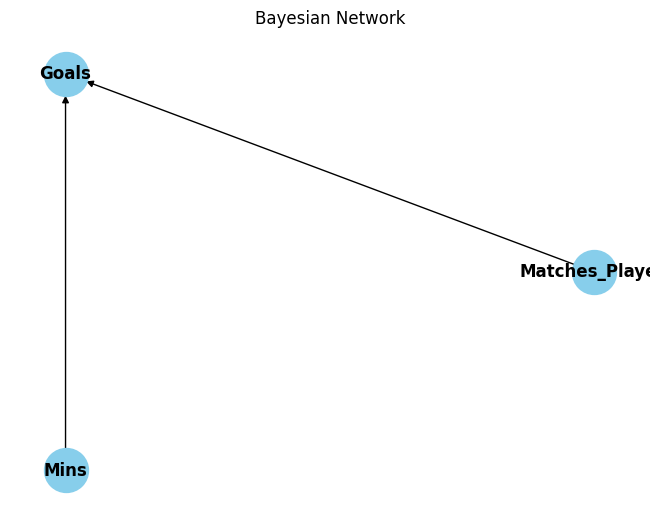

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Select relevant features for the Bayesian Network
features = ['Matches_Played', 'Mins', 'Goals']

# Define the structure of the Bayesian Network based on your features
model_structure = [
    ('Matches_Played', 'Goals'),
    ('Mins', 'Goals')
    # Add other edges as needed based on your domain knowledge
]

# Create a Bayesian Network with the specified structure
model = BayesianNetwork(model_structure)

# Fit the model with data using Maximum Likelihood Estimation
model.fit(df[features], estimator=MaximumLikelihoodEstimator, n_jobs=1)

# Print the CPDs (conditional probability distributions)
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes and edges based on the Bayesian Network structure
graph.add_edges_from(model_structure)

# Draw the graph with circular layout
pos = nx.circular_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=1000, node_color='skyblue', font_weight='bold', arrows=True)
plt.title('Bayesian Network')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[['Goals', 'Shots', 'OnTarget', 'Mins']]
df['IsTopScorer'] = df['Goals'] > 15
y = df['IsTopScorer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree model with entropy as the criterion
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0
Confusion Matrix:
[[130   0]
 [  0  35]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       130
        True       1.00      1.00      1.00        35

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



Accuracy: 0.9151515151515152
Confusion Matrix:
[[130   0]
 [ 14  21]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       130
        True       1.00      0.60      0.75        35

    accuracy                           0.92       165
   macro avg       0.95      0.80      0.85       165
weighted avg       0.92      0.92      0.91       165



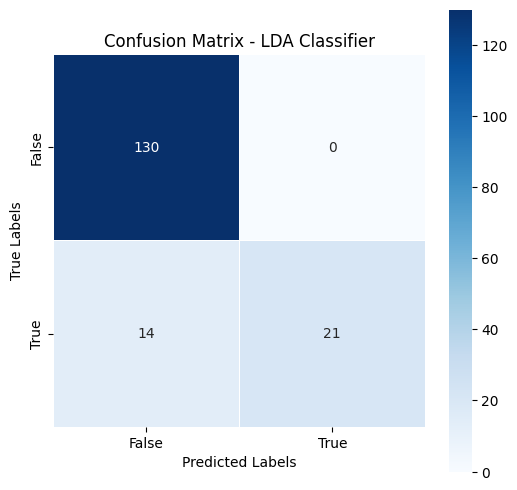

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your features (X) and target variable (y) ready
# For example, let's assume X contains your features and y contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True,
            xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - LDA Classifier')
plt.show()

Explained Variance Ratio: [0.85710144 0.08670369]


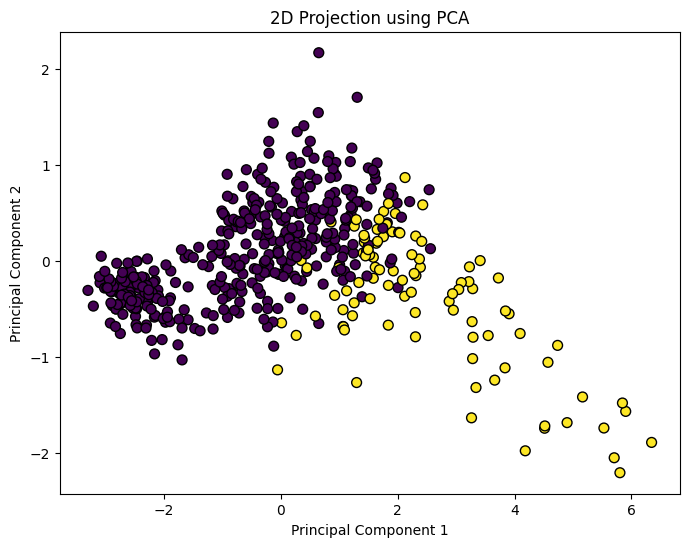

In [ ]:
#PCA MODEL
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have your features (X) ready
# For example, let's assume X contains your features

# Split the data into training and testing sets
# Ensure y is included in the split to maintain consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Visualize the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the 2D projection
plt.figure(figsize=(8, 6))

# Use y_train with the same number of elements as X_train_pca
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)

plt.title('2D Projection using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Initialize a logistic regression model
logreg_pca = LogisticRegression()

# Train the model
logreg_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy (PCA): {accuracy_pca}")

Accuracy (PCA): 0.9212121212121213


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Select features and target variable
X = df[['Goals', 'Shots', 'OnTarget', 'Mins']]
y = df['IsTopScorer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize K-NN model with different distance metrics
k_values = [5,9]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for k in k_values:
    for metric in distance_metrics:
        # Initialize K-NN model
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Train the model
        knn_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = knn_model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        # Display the results
        print(f"K-NN with k={k} and distance metric={metric}")
        print(f"Accuracy: {accuracy}")
        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Classification Report:\n{classification_rep}")
        print("\n")

K-NN with k=5 and distance metric=euclidean
Accuracy: 0.8545454545454545
Confusion Matrix:
[[124   6]
 [ 18  17]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.95      0.91       130
        True       0.74      0.49      0.59        35

    accuracy                           0.85       165
   macro avg       0.81      0.72      0.75       165
weighted avg       0.84      0.85      0.84       165



K-NN with k=5 and distance metric=manhattan
Accuracy: 0.8727272727272727
Confusion Matrix:
[[125   5]
 [ 16  19]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       130
        True       0.79      0.54      0.64        35

    accuracy                           0.87       165
   macro avg       0.84      0.75      0.78       165
weighted avg       0.87      0.87      0.86       165



K-NN with k=5 and distance metric=chebyshev
Accuracy: 0.836363636363

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and target variable
X = df[['Goals', 'Shots', 'OnTarget', 'Mins']]  # Adjust features as needed
y = df['IsTopScorer']  # Assuming you have a binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
naive_bayes_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
decision_tree_model = DecisionTreeClassifier(criterion='entropy')

# List of models for iteration
models = [naive_bayes_model, knn_model, decision_tree_model]

# Evaluate each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Display the results
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")
    print("\n")


Model: GaussianNB
Accuracy: 0.9212121212121213
Confusion Matrix:
[[120  10]
 [  3  32]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.92      0.95       130
        True       0.76      0.91      0.83        35

    accuracy                           0.92       165
   macro avg       0.87      0.92      0.89       165
weighted avg       0.93      0.92      0.92       165



Model: KNeighborsClassifier
Accuracy: 0.8545454545454545
Confusion Matrix:
[[124   6]
 [ 18  17]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.95      0.91       130
        True       0.74      0.49      0.59        35

    accuracy                           0.85       165
   macro avg       0.81      0.72      0.75       165
weighted avg       0.84      0.85      0.84       165



Model: DecisionTreeClassifier
Accuracy: 1.0
Confusion Matrix:
[[130   0]
 [  0  35]]
Classification Report:
  

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes model

model = GaussianNB()  # Replace with your actual model
num_folds = 10

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation and compute accuracy
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", cross_val_results)

# Calculate and print the average accuracy
average_accuracy = cross_val_results.mean()
print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation: {cross_val_results.std()}")

Accuracy for each fold: [0.95454545 0.89393939 0.89393939 0.93939394 0.92424242 0.90909091
 0.90909091 0.93939394 0.93939394 0.92424242]
Average Accuracy: 0.9227272727272726
Standard Deviation: 0.019696969696969727


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Confusion Matrix:
[[130   0]
 [  0  35]]
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
if precision == 1.0 and recall == 1.0 and accuracy == 1.0:
    print("The model may be overfitting.")
elif precision < 0.5 or recall < 0.5 or accuracy < 0.8:
    print("The model may be underfitting or needs improvement.")
else:
    print("The model performance looks reasonable.")

The model may be overfitting.
